In [1]:
using ChaosCrypto
using PyPlot

In [2]:
#Funciones Runge Kutta
function runge2(f,x,t,dt)
    k1 = f(x,t)
    k2 = f(x+2dt*k1/3, t+2*dt/3)
    (k1/4+3k2/4)
end

function runge4(f,x,t,dt)
    k1 = f(x,t)
    k2 = f(x+dt*k1/2, t+dt/2)
    k3 = f(x+dt*k2/2,t+dt/2)
    k4 = f(x+dt*k3,t + dt)
    (k1+2k2+2k3+k4)/6
end

function superrunge(f,x,t,dt)
    x1x,u1x,x1y,u1y,x2x,u2x,x2y,u2y = x
    normi = ((x1x-x2x)^2+(x1y-x2y)^2)^(-3/2)
    if normi < 1e-3
        return "fin"
    else
        k1 = f(x,t)
        k2 = f(x+dt*k1/2, t+dt/2)
        k3 = f(x+dt*k2/2,t+dt/2)
        k4 = f(x+dt*k3,t + dt)
        (k1+2k2+2k3+k4)/6
    end
end

superrunge (generic function with 1 method)

In [3]:
#Integracion
function integrar(f, x0, t0, t_final, dt, metodo = 4)
    # necesito una function f(x,t)
    # que come un vector x, el tiempo t
    # y regresa un vector (el campo vectorial evaluado en x,t)
    
    tiempos = [t0]
    xs = typeof(x0)[x0]

    #x = copy(x0)  # ver pythontutor.com
    
    x = x0
    
    for t in t0:dt:t_final
        if metodo == 1
            k = f(x,t)
        elseif metodo == 2
            k = runge2(f,x,t,dt)
        elseif metodo == 4
            k = runge4(f,x,t,dt)
        elseif metodo == 20
            k = superrunge(f,x,t,dt)
            if k == "fin"
                return xs, tiempos
            end
        else
            error("Los únicos métodos son 1 2 ó 4")
        end
        x_nueva = x + dt*k
        
        push!(xs, x)
        push!(tiempos, t)
        
        x = x_nueva
        
    end
    
    xs, tiempos
end

integrar (generic function with 2 methods)

In [4]:
#Funcion para generar Taylor
function generarTaylor(condIni, funcion)
    funcion(condIni)
end

#Funcion para generar serie
function generarSerie(polTalor)
    x = Float64[]
    push!(x, polTalor.ini)
    valores = copy(polTalor.coef)
    for i in 1:length(valores)
        push!(x, valores[i]/i)
    end
    x
end

#Funcion para generar intervalos
function generaIntervalo(lista)
    p = length(lista)
    h = lista[end]
    while (lista[p] == 0)
        p -= 1
        h = lista[p]
    end
    ϵ = 1e-3
    (ϵ/h)^(1/p)
end

#Funcion horner
function horner(x,h = 1e-3)
    p = length(x)
    xt = zeros(x)
    xt[p-1] = x[p-1] + h*x[p]
    for i in 3:p
        xt[p-i+1] = x[p-i+1] + h*xt[p-i+1+1]
    end
    xt[1]
end

#Funcion Lorenz
function lorenz(xx, t)
    x, y, z, xr, yr, zr= xx
    AD.Taylor(x, [σ])*(AD.Taylor(x,[y])-AD.Taylor(x,[x])),
    AD.Taylor(y,[x])*(AD.Taylor(y,[ρ])-AD.Taylor(y,[z]))-AD.Taylor(y,[y]),
    AD.Taylor(z,[x])*AD.Taylor(z,[y])-AD.Taylor(z,[β])*AD.Taylor(z,[z]),
    AD.Taylor(xr,[σ])*(AD.Taylor(xr,[y])-AD.Taylor(xr,[xr])),
    AD.Taylor(yr,[ρ])*AD.Taylor(yr,[xr])-AD.Taylor(yr,[yr])-AD.Taylor(yr,[xr])*AD.Taylor(yr,[zr]),
    AD.Taylor(zr,[xr])*AD.Taylor(zr,[yr])-AD.Taylor(zr,[β])*AD.Taylor(zr,[zr])
end

lorenz (generic function with 1 method)

In [5]:
#Funcion integradora 
function integrador(x0, f, tf)
    a = generarTaylor(x0,f)
    b = map(generarSerie,a)
    suma = map(horner,b)
    sol = Array{Float64,1}[x0, [suma...]]
    t = [0.,1e-3]
    while t[end] < tf
        a = generarTaylor(sol[end],f)
        b = map(generarSerie,a)
        suma = map(horner,b)
        push!(sol,[suma...])
        push!(t,t[end]+1e-3)
    end
    sol,t
end

integrador (generic function with 1 method)

σ = 10
ρ = 60
β = 8/3

In [6]:
σ = 16.
ρ = 45.6
β = 4.

4.0

In [7]:
function lorenzSin(xx,t)
    x, y, z, xr, yr, zr = xx
    
    φ = 1e-3
    m = sin(φ*t)
    s = x + m
    
    [σ*(y-x), (ρ*x - y - x*z), x*y-β*z,
     σ*(yr-xr), (ρ*s - yr - s*zr) , (s*yr - β*zr)]
end

lorenzSin (generic function with 1 method)

Se va a intentar encontrar cuál es la fuente

In [8]:
xsSin, tsSin = integrar(lorenzSin,[1., 1., 1., 10., 10., 10.],0. ,100. ,1e-3,4)

([[1.0,1.0,1.0,10.0,10.0,10.0],[1.0,1.0,1.0,10.0,10.0,10.0],[1.0003468600734644,1.04358485998736,0.9970278769411757,10.000203740346695,10.025606315674683,9.970073868601201],[1.0013799045337006,1.0871599035256896,0.994111851346723,10.000810885447239,10.051241530409772,9.940299708469327],[1.0030883278260374,1.1307554382231262,0.991252518132454,10.001815683373346,10.076929773713427,9.910683826464306],[1.005461973014124,1.1744012791421603,0.9884505767656296,10.003212853725866,10.102694830669634,9.881232475223378],[1.0084913138949072,1.218126777354792,0.9857068296528242,10.004997574853764,10.128560163245934,9.85195185884781],[1.012167437844332,1.2619608476980808,0.9830221808669002,10.007165471609497,10.154548931017604,9.822848138638916],[1.016482029369726,1.305931995760928,0.9803976351982487,10.00971260362322,10.180684011331417,9.79392743888077],[1.0214273543456855,1.350068344131914,0.9778342975168288,10.012635454078834,10.206988018931245,9.765195852667727]  …  [-7.247240384349474,-5.598236

In [9]:
x = Float64[x[1] for x in xsSin]
xr = Float64[x[4] for x in xsSin]

100002-element Array{Float64,1}:
 10.0    
 10.0    
 10.0002 
 10.0008 
 10.0018 
 10.0032 
 10.005  
 10.0072 
 10.0097 
 10.0126 
 10.0159 
 10.0196 
 10.0236 
  ⋮      
 -7.47498
 -7.44542
 -7.41682
 -7.38916
 -7.36245
 -7.33668
 -7.31184
 -7.28793
 -7.26495
 -7.2429 
 -7.22176
 -7.20154

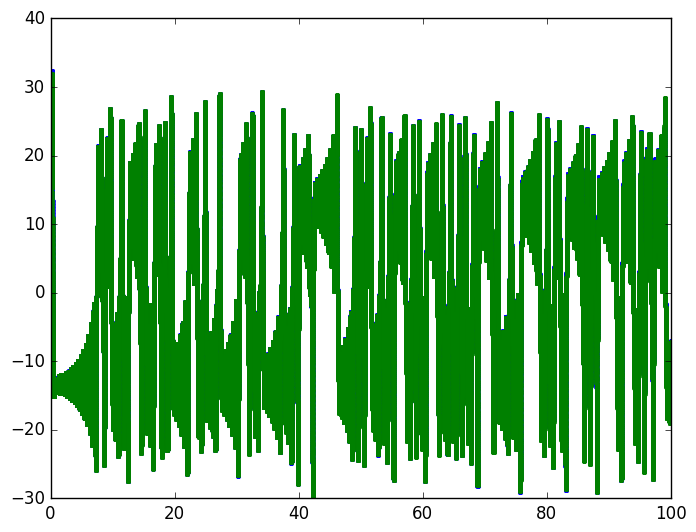

In [10]:
plot(tsSin, x,".-")
plot(tsSin, xr,".")
legend()

In [11]:
m = sin(tsSin);

In [12]:
s = [x[1] for x in xsSin] + m
m_hat = s - [x[4] for x in xsSin]

100002-element Array{Any,1}:
 -9.0     
 -9.0     
 -8.99886 
 -8.99743 
 -8.99573 
 -8.99375 
 -8.99151 
 -8.989   
 -8.98623 
 -8.98321 
 -8.97993 
 -8.97641 
 -8.97265 
  ⋮       
 -0.342762
 -0.343641
 -0.344526
 -0.345418
 -0.346316
 -0.34722 
 -0.34813 
 -0.349045
 -0.349967
 -0.350893
 -0.351825
 -0.352763

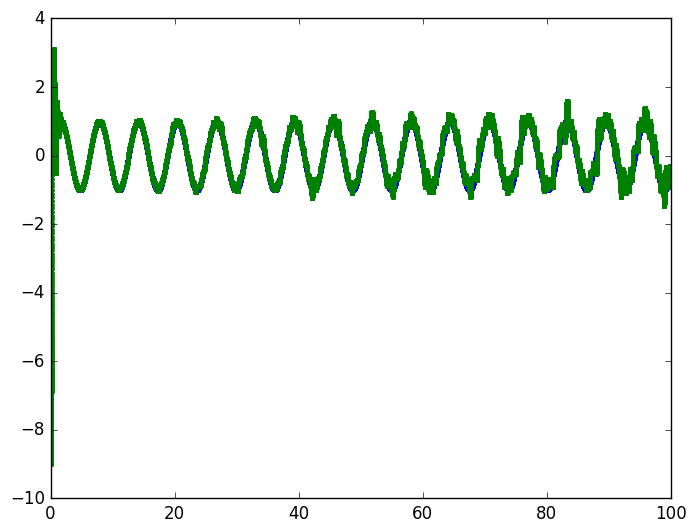

In [13]:
plot(tsSin, m,".-")
plot(tsSin, m_hat,".")
legend()

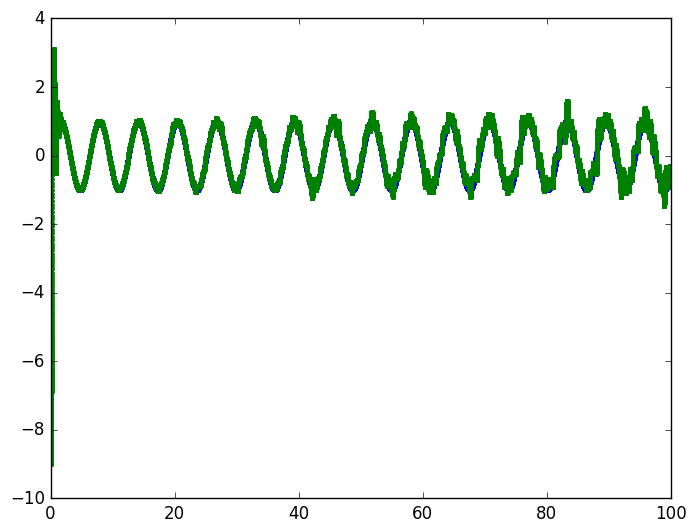

In [14]:
plot(tsSin, m,".-")
plot(tsSin, m_hat,".")
legend()

##  Paso

In [15]:
σ = 16.
ρ = 45.6
β = 4.

4.0

In [16]:
function paso(x)
    if (x > 5 && x < 10) || (x > 15 && x < 20) || (x > 25 && x < 30)
        return .1
    end 
    0.
end

paso (generic function with 1 method)

In [17]:
function paso(x,t)
    tiempo = mod(t,x)
    if tiempo > t/2
        
end

LoadError: LoadError: syntax: incomplete: "function" at In[17]:1 requires end
while loading In[17], in expression starting on line 1

In [18]:
function lorenzpaso(xx,t)
    x, y, z, xr, yr, zr = xx
    
    m = paso(t)
    s = x + m
    
    [σ*(y-x), (ρ*x - y - x*z), x*y-β*z,
     σ*(yr-xr), (ρ*s - yr - s*zr) , (s*yr - β*zr)]
end

lorenzpaso (generic function with 1 method)

In [19]:
xsPaso, tsPaso = integrar(lorenzpaso,[1., 1., 1., 0., 0., 0.],0. ,30. ,1e-2,4)

([[1.0,1.0,1.0,0.0,0.0,0.0],[1.0,1.0,1.0,0.0,0.0,0.0],[1.0331975910289066,1.4389225281038844,0.972895617120185,0.03470755309824,0.458783935523144,0.002293124948020283],[1.127905778889626,1.9023723811797573,0.9523872019191382,0.13364147239834334,0.9422218718714049,0.009612624925194754],[1.2806598459668022,2.416432226539083,0.9404669990857486,0.292995606261222,1.47692850126541,0.023489229641913276],[1.4922759359345805,3.0063347102487255,0.940355136799274,0.513369249281334,2.08861679510451,0.046754747569414654],[1.7672243445716314,3.698144980682556,0.9569253725989648,0.7991179588926509,2.803826342132933,0.08393463503231861],[2.113322273601731,4.5201722028349005,0.9974061972531758,1.1580333891967955,3.6513743448696885,0.14192899756012795],[2.5416655985664147,5.50419032451818,1.0724408133213466,1.601269694736767,4.663614006006015,0.231063810489138],[3.066738169621088,6.686483529930439,1.1976435323956587,2.1434539195553284,5.877519430048024,0.3666504148168145]  …  [-15.767330386567343,-25.76

In [20]:
mpaso = [paso(p) for p in tsPaso]

3002-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.0

In [21]:
s = [x[1] for x in xsPaso] + mpaso
m_hat_paso = s - [x[4] for x in xsPaso]

3002-element Array{Any,1}:
  1.0       
  1.0       
  0.99849   
  0.994264  
  0.987664  
  0.978907  
  0.968106  
  0.955289  
  0.940396  
  0.923284  
  0.903719  
  0.881359  
  0.855741  
  ⋮         
 -0.0922957 
 -0.107386  
 -0.1178    
 -0.122094  
 -0.118718  
 -0.106174  
 -0.0832791 
 -0.0494768 
 -0.00515725
  0.0481477 
  0.107799  
  0.0703703 

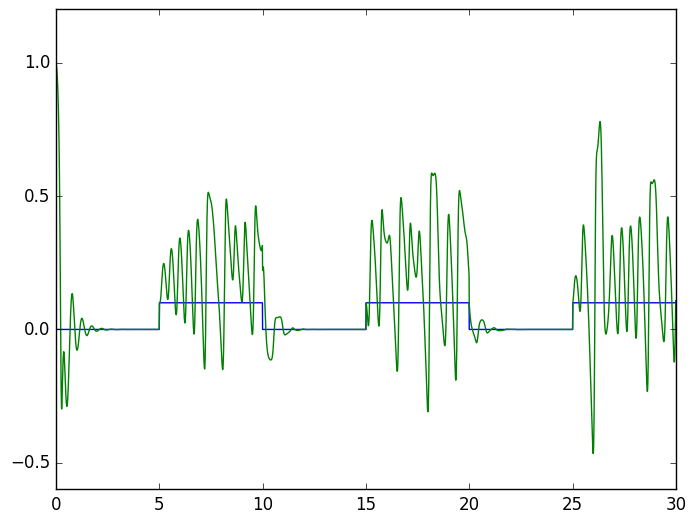

In [22]:
plot(tsPaso, mpaso)
plot(tsPaso, m_hat_paso)
legend()

##  Se hace la señal igual a cero

In [23]:
function lorenzZero(xx,t)
    x, y, z, xr, yr, zr = xx
    
    m = zero(t)
    s = x + m
    
    [σ*(y-x), (ρ*x - y - x*z), x*y-β*z,
     σ*(yr-xr), (ρ*s - yr - s*zr) , (s*yr - β*zr)]
end

lorenzZero (generic function with 1 method)

In [24]:
xs, ts = integrar(lorenzZero,[1., 1., 1., 1., 10, 10],0. ,30. ,1e-3,4)

([[1.0,1.0,1.0,1.0,10.0,10.0],[1.0,1.0,1.0,1.0,10.0,10.0],[1.0003468600734644,1.04358485998736,0.9970278769411757,1.1430578596761325,10.025606297872304,9.970073863593404],[1.0013799045337006,1.0871599035256896,0.994111851346723,1.284251645826505,10.051241459190923,9.940299688406967],[1.0030883278260374,1.1307554382231262,0.991252518132454,1.4236115969144274,10.076929613450444,9.910683781253747],[1.005461973014124,1.1744012791421603,0.9884505767656296,1.561167851668167,10.102694545721913,9.881232394723801],[1.0084913138949072,1.218126777354792,0.9857068296528242,1.6969504453674311,10.128559717960625,9.851951732870653],[1.012167437844332,1.2619608476980808,0.9830221808669002,1.8309893065223293,10.15454828973037,9.822847956947097],[1.016482029369726,1.305931995760928,0.9803976351982487,1.9633142539295103,10.180683138367252,9.793927191187686],[1.0214273543456855,1.350068344131914,0.9778342975168288,2.0939549940907676,10.206986878605367,9.765195528636035]  …  [-1.5968941057812973,-2.5812196

In [25]:
mzero = [zero(p) for p in ts]

30002-element Array{Any,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [26]:
s = [x[1] for x in xs] + mzero
m_hat_paso = s - [x[4] for x in xs]

30002-element Array{Any,1}:
  0.0     
  0.0     
 -0.142711
 -0.282872
 -0.420523
 -0.555706
 -0.688459
 -0.818822
 -0.946832
 -1.07253 
 -1.19594 
 -1.31712 
 -1.43609 
  ⋮       
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     

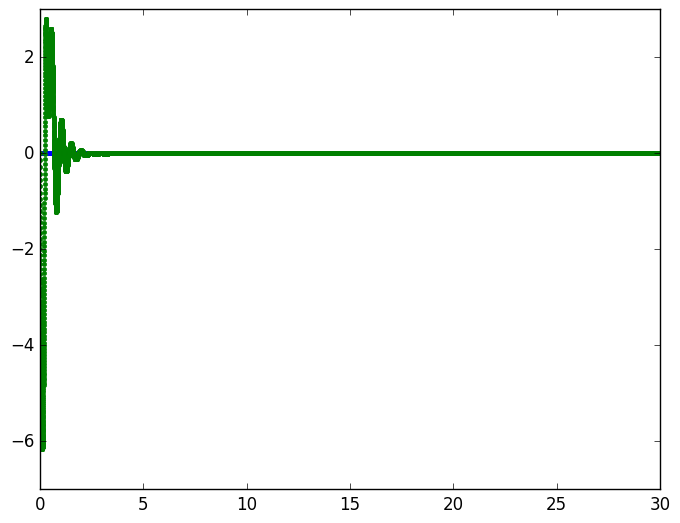

In [27]:
plot(ts, mzero,".")
plot(ts, m_hat_paso,".")
legend()